## Plotly와 Matplotlib, Seaborn을 이용한 노벨상 분석

- 이번 시간에는 과거 노벨상 수상자들에 대한 데이터셋을 분석할 예정이다. 대략적 분석할 내용은 아래와 같다. 
    - 과거 수상자들에 대해 어떤 패턴을 발견할 수 있는지?
    - 노벨상과 우리의 세계에 대해 더 일반적인 뭔가를 배울 수 있는지?

<img src="asset/nobel_prize.png">

- 1895년 11월 27일, 알프레도 노벨은 그의 마지막 유언장에 서명했다. 노벨 사후 유언장이 공개되었을 때, 그의 부를 노벨상 제정을 위해 남겨두기로 해서 많은 논란이 있었다(왜냐하면 노벨은 다이너마이트를 개발한 죽음의 상인이라고 불렸기 때문). 
- 유언장 내용은 '나의 전 재산을 전 인류에게 가장 큰 공헌을 한 사람에게 사용하라' 였다.
- 현재 매년 노벨상은 화학, 문학, 물리학, 생리학, 의학, 경제, 평화 분야의 과학자와 수학자들이게 수여된다.

### 이번 시간에 다룰 내용 
- 단계구분도를 만들어 지도에 데이터 표시 
- 데이터의 여러 부분들을 plotly를 통해 보여주는 막대 차트를 만들기
- plotly를 통해 선버스트 차트를 만들기
- Seaborn의 . lmplot()을 사용하고, row나 hue, lowess 매개변수를 사용하여 여러 범주에 걸친 최적의 선을 표시하기
- 같은 데이터를 다른 방식으로 볼 때 어떻게 다른 그림이 나타나는지 이해하기(상자 그림과 시계열 분석)
- Seaborn의 히스토그램을 이용하여, 데이터 분포를 확인하고 기술 통계를 시각화하기

### 1. 데이터 탐색 및 전처리 

In [1]:
# 필요 패키지 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 
import plotly.express as px 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### 1-1. 데이터 탐색

In [2]:
# 데이터 불러오기 
data = pd.read_csv('data/nobel_prize_data.csv')
data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU


In [3]:
# 데이터 수 및 컬럼명 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [4]:
# 노벨상이 처움 수여된 해 확인
print(f'First Nobel Pirze year: {data.year.min()}')
print(f'Most recents Nobel Prize year on this dataset:{data.year.max()}')

First Nobel Pirze year: 1901
Most recents Nobel Prize year on this dataset:2020


- 데이터의 수는 962개의 행과 16개의 열이 있다. 
- 노벨상이 처음 수여된 해는 1901년 이고, 데이터셋 기준 최근 수여된 해는 2020년이다.
- 해당 데이터셋의 컬럼 정보는 아래와 같다. 
    - year: 노벨상 수여 년도 
    - category: 노벨상 분야
    - prize: 노벨상 명칭 
    - motivation: 연구에 대한 동기부여 
    - prize_share: 노벨상 분배(공동 수상 여부 확인)
    - laureate_type: 수상 타입(Individual: 개인, Organization: 조직)
    - full_name: 수상자 이름
    - birth_date: 수상자 생년월일
    - birth_city: 수상자 출생 도시
    - birth_country: 수상자 출생 국가 (현재 존재하지 않는 국가일 경우 해당 열에 기입한 데이터)
    - birth_country_current: 수상자 출생 국가의 현재 이름
    - sex: 수상자 성별
    - organization_name: 수상자가 소속된 연구 기관 이름
    - organization_city: 수상자가 소속된 연구 기관이 있는 도시 
    - organization_country: 수상자가 소속된 연구 기관이 있는 국가
    - ISO: 국가 코드(ISO 표준 코드)

#### 1-2. 중복값 및 결측값 확인

In [5]:
# 중복 데이터 개수 확인 
print(f'Any duplicates? {data.duplicated().sum()}')
# 또는 - data.duplicated().values.any()

Any duplicates? 0


In [6]:
# NaN 값 확인
data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

- 데이터셋에 중복값은 존재하지 않고, NaN 값은 존재한다. 
- NaN 값이 존재하는 열 및 개수는 아래와 같다
    - motivation - 88건
    - birth_date - 28건
    - birth_city - 31건
    - birth_country - 28건
    - birth_country_current - 28건
    - sex - 28건
    - organization_name - 255건 
    - organization_city - 255건
    - organization_country - 255건
    - ISO - 28건

In [7]:
# NaN 값들만 있는 데이터 필터링 - 생년월일 열 기준으로 필터링 
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
data.loc[data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [8]:
# NaN 값들만 있는 데이터 필터링 - 조직기관 열 기준으로 필터링 
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
data.loc[data.organization_name.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
1,1901,Literature,Individual,1839-03-16,Sully Prudhomme,NaN
3,1901,Peace,Individual,1822-05-20,Frédéric Passy,NaN
4,1901,Peace,Individual,1828-05-08,Jean Henry Dunant,NaN
7,1902,Literature,Individual,1817-11-30,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,1843-05-21,Charles Albert Gobat,NaN
...,...,...,...,...,...,...
932,2018,Peace,Individual,1993-07-02,Nadia Murad,NaN
942,2019,Literature,Individual,1942-12-06,Peter Handke,NaN
946,2019,Peace,Individual,1976-08-15,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,1943-04-22,Louise Glück,NaN


- 생년월일에 NaN 값이 왜 많은 것일까? 그리고 조직 열에 값이 없는 경우는 무엇일까? 
- 위와 같이 생년월일 열의 NaN 값을 필터링 해보면 UN이나 적십자와 같은 여러 기관임을 알 수 있다. 그리고 해당 조직들의 명칭은 full_name 열에 있으므로 organization_name 열에는 NaN이 포함된다.
- 추가적으로, organization_name열에 값이 없는 행을 살펴보면, 노벨상은 대학이나 연구소에 소속되지 않은 사람에게도 수여되는 것을 확인할 수 있는데, 문학상 이나 평화상이 여기에 포함된다.

#### 1-3. 데이터 타입 변경 및 공동 수상 비율 컬럼 추가

In [9]:
# 수상자 출생년도 datetiem으로 데이터 타입 변경 
data['birth_date'] = pd.to_datetime(data['birth_date'])
type(data['birth_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# 공동 수상자 비율 계산 후 컬럼 추가 
separated_values = data.prize_share.str.split('/', expand=True)  # '/' 기준으로 문자열 분리 
numerator = pd.to_numeric(separated_values[0])                   # 분자 - 분리한 첫 번째 문자열을 숫자(int)로 변환 
denomenator = pd.to_numeric(separated_values[1])                 # 분모 - 분리한 두 번째 문자열을 숫자(int)로 변환 
data['share_pct'] = numerator / denomenator                      # 비율 계산 후 추가한 'share_pct'컬럼에 저장
data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.000000
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.000000
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.000000
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.500000
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.333333
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.250000
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.250000


### 2. Plotly 막대 및 도넛 차트: 시상 부문 및 여성 수상자 분석하기
- 데이터 사이언스의 큰 부분 중 하나는 우리가 탐구하고자 하는 것이 무엇인지 생각해보는 것이다.
    1. 노벨 수상자 중 여성 비율은 어느 정도 될까? 
    2. 최소 여성 노벨 수상자는 누구며, 어떤 사람들일까?
    3. 노벨상을 2번 이상 받은 사람은 누구일까?
    4. 노벨상의 수상 부문은 무엇이 있을까? 
    5. 노벨 경제학상을 처음으로 수여된 때는 언제이며, 수상자는 누구일까? 

#### 2-1. 노벨 수상자 중 여성 비율은 어느정도 될까? 

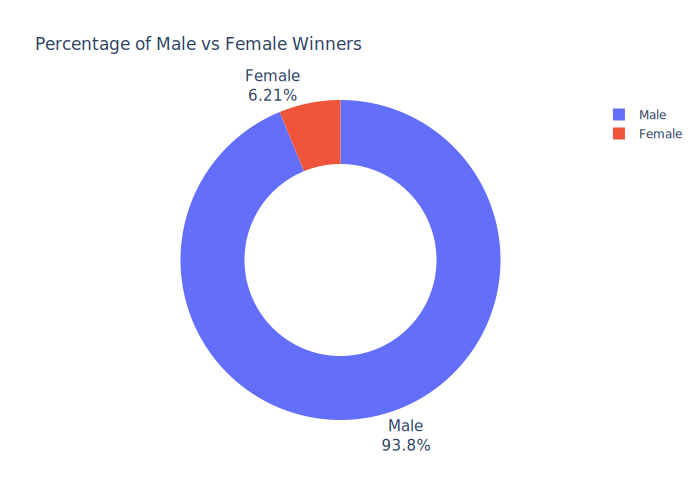

In [11]:
# 노벨 수상자 상별 비율 도넛차트 그리기 
sex_rating = data.sex.value_counts()

# 도넛차트 만들기 
fig = px.pie(labels=sex_rating.index, 
             values=sex_rating.values, 
             title="Percentage of Male vs Female Winners", 
             names=sex_rating.index, 
             hole=0.6)                                                  # 제목, 범주 명칭 설정 + 파이차트를 위한 hole 인자 추가

fig.update_traces(textposition='outside', 
                  textfont_size=15, textinfo='percent+label')           # 파이차트 내 text 설정 - 레이블 위치와 표기 설정 등

fig.show(renderer='svg') 

#### 2-2. 최소 여성 노벨 수상자는 누구며, 어떤 사람들일까?

In [12]:
# 첫 여성 노벨상 수상자 3명의 데이터 필터링
data[data['sex'] == 'Female'].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


- 노벨상 수상자 성별 비율을 조사한 결과 여성의 비율은 6.21%로 나타났다. 
- 첫 여성 노벨상 수상자 3명(혹은 3개의 조직)은 아래와 같다
    1. Marie Curie, née Sklodowska
    2. Baroness Bertha Sophie Felicita von Suttner
    3. Selma Ottilia Lovisa Lagerlöf
- 여기서 최초 여성 수상자는 "마리 퀴리"이다. 물리학 상을 받았는데, 개인이 받았지만 공동 수상인 4명 중 1명으라고 표시되어 있다. 
- 3명의 수상자 각각 러시아 제국(폴란드), 오스트리아 제국(체코 공화국), 스웨덴 출신이다.

#### 2-3. 노벨상을 두 번 이상 받은 사람은 누구인가?

In [13]:
# 노벨상을 두 번 이상 받은 사람 추출
is_winner = data.duplicated(subset=['full_name'], keep=False)
multiple_winners = data[is_winner]
print(f'There are "{multiple_winners.full_name.nunique()}' \
      ' winners" who were awarded the prize more than once.')

col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

There are "6 winners" who were awarded the prize more than once.


,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


- 노벨상을 두 번 이상 받은 사람(혹은 단체)는 총 6명이다. 
- 이들 중 개인 자격으로 두 번 이상 받은 사람은 4명이다.

#### 2-4. 노벨상은 몇 개의 부문이 있으며, 가장 많이 수여된 부문과 적게 수여된 부문은 무엇일까?

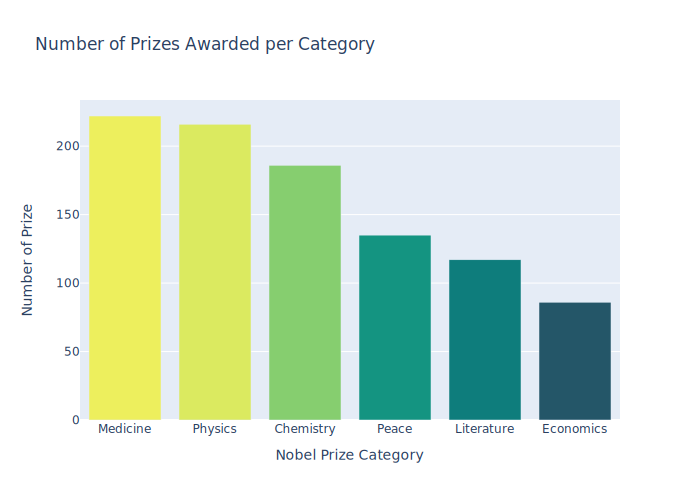

In [14]:
# 노벨상 부문 추출
nobel_category = data['category'].value_counts()

bar = px.bar(x=nobel_category.index, 
             y=nobel_category.values,
             color = nobel_category.values,
             color_continuous_scale='Aggrnyl',
             title='Number of Prizes Awarded per Category')

bar.update_layout(xaxis_title="Nobel Prize Category", 
                  coloraxis_showscale=False,
                  yaxis_title='Number of Prize')

bar.show(renderer='svg')

- 노벨상은 6개 부문으로 구성되어 있다. 가장 많이 수여된 부문은 의학상 이고, 가장 적게 수여된 부문은 경제학상 이다.

In [15]:
cat_men_women = data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


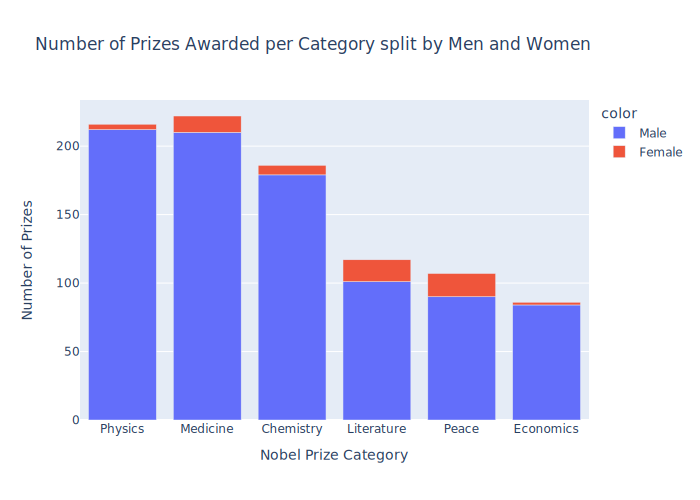

In [16]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')

v_bar_split.show(renderer='svg')

- 그럼 노벨상을 수상한 부문을 성별로 구분해보았다. 전반적으로 물리학, 경제학, 화학의 성비 불균형이 크다는 것을 알 수 있다. 
- 여성들은 주로 의학, 문학, 평화 부분의 수상이 상대적으로 많았다. 

#### 2-5. 노벨 경제학상을 처음으로 수여된 때는 언제이며, 수상자는 누구일까?

In [17]:
data[data['category'] == 'Economics'].head(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.5
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.5
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.0
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,1.0
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,0.5


- 노벨 경제학상이 처음으로 수여된 때는 1969년 이고, 최초 수상자는 공동 수상으로 "얀 틴베르헌"과 "랑나르 안톤 시틸 프리슈" 이다.

- 질문에 대한 답변을 정리하고자 한다. 
    1. 노벨 수상자 중 여성 비율은 어느정도 될까?
        - 1901년 이후 역대 노벨상 수상자 중 여성은 6.2%에 불과하다. 
    2. 최초 여성 노벨상 수상자 3인은 누구인가?
        - Marie Curie, née Sklodowska (러시아 제국(폴란드))
        - Baroness Bertha Sophie Felicita von Suttner (오스트리아 제국(체코 공화국))
        - Selma Ottilia Lovisa Lagerlöf (스웨덴)
    3. 노벨상 다회 수상자는 누구인가? 
        - 노벨상을 두 번 이상 받은 사람(혹은 단체)는 총 6명이며, 이들 중 개인 자격으로 두 번 이상 받은 사람은 4명이다.
        - 그 중 "마리 퀴리"는 물리학에서 한 번, 화학에서 한 번 수상, " 라이너스 칼 폴링"은 화학상 수상, 핵 군축에 대한 업적으로 평화상을 수상, "국제 적십자사"는 3번의 평화상을 수상했으며, 앞선 2회는 모두 세계 대전중 수상 하였다.
    4. 노벨상은 몇 개의 부문이 있으며, 가장 많이 수여된 부문과 적게 수여된 부문은 무엇일까?
        - 노벨상은 6개 부문으로 구성되어 있다. 가장 많이 수여된 부문은 "의학상" 이고, 가장 적게 수여된 부문은 "경제학상" 이다.
        - 추가적으로 노벨상을 수상한 부문을 성별로 구분해본 결과, 전반적으로 물리학, 경제학, 화학의 성비 불균형이 크다는 것을 알 수 있으며, 여성들은 주로 의학, 문학, 평화 부분의 수상이 상대적으로 많았다.
    5. 노벨 경제학상을 처음으로 수여된 때는 언제이며, 수상자는 누구일까?
        - 노벨 경제학상이 처음으로 수여된 때는 1969년 이고, 최초 수상자는 공동 수상으로 "얀 틴베르헌"과 "랑나르 안톤 시틸 프리슈" 이다.
        - 여기서 경제학상 수상자가 왜 적은지 알 수 있다. 1901년 부터 수상된 물리학상에 비해, 경제학상은 1969년에 처음 수여 되었기 때문이다.

### 3. Matplotlib으로 시대에 따른 추세 시각화하기

#### 3-1. 매년 수상 회수  시계열 차트로 나타내기

In [18]:
# 매년 수상하는 노벨상 수 세기
prize_per_year = data.groupby(by='year').count().prize
prize_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [19]:
# 5년 이동 평균 계산 
moving_average = prize_per_year.rolling(window=5).mean()
moving_average

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905     6.2
        ... 
2016    11.6
2017    12.0
2018    12.0
2019    12.2
2020    12.4
Name: prize, Length: 117, dtype: float64

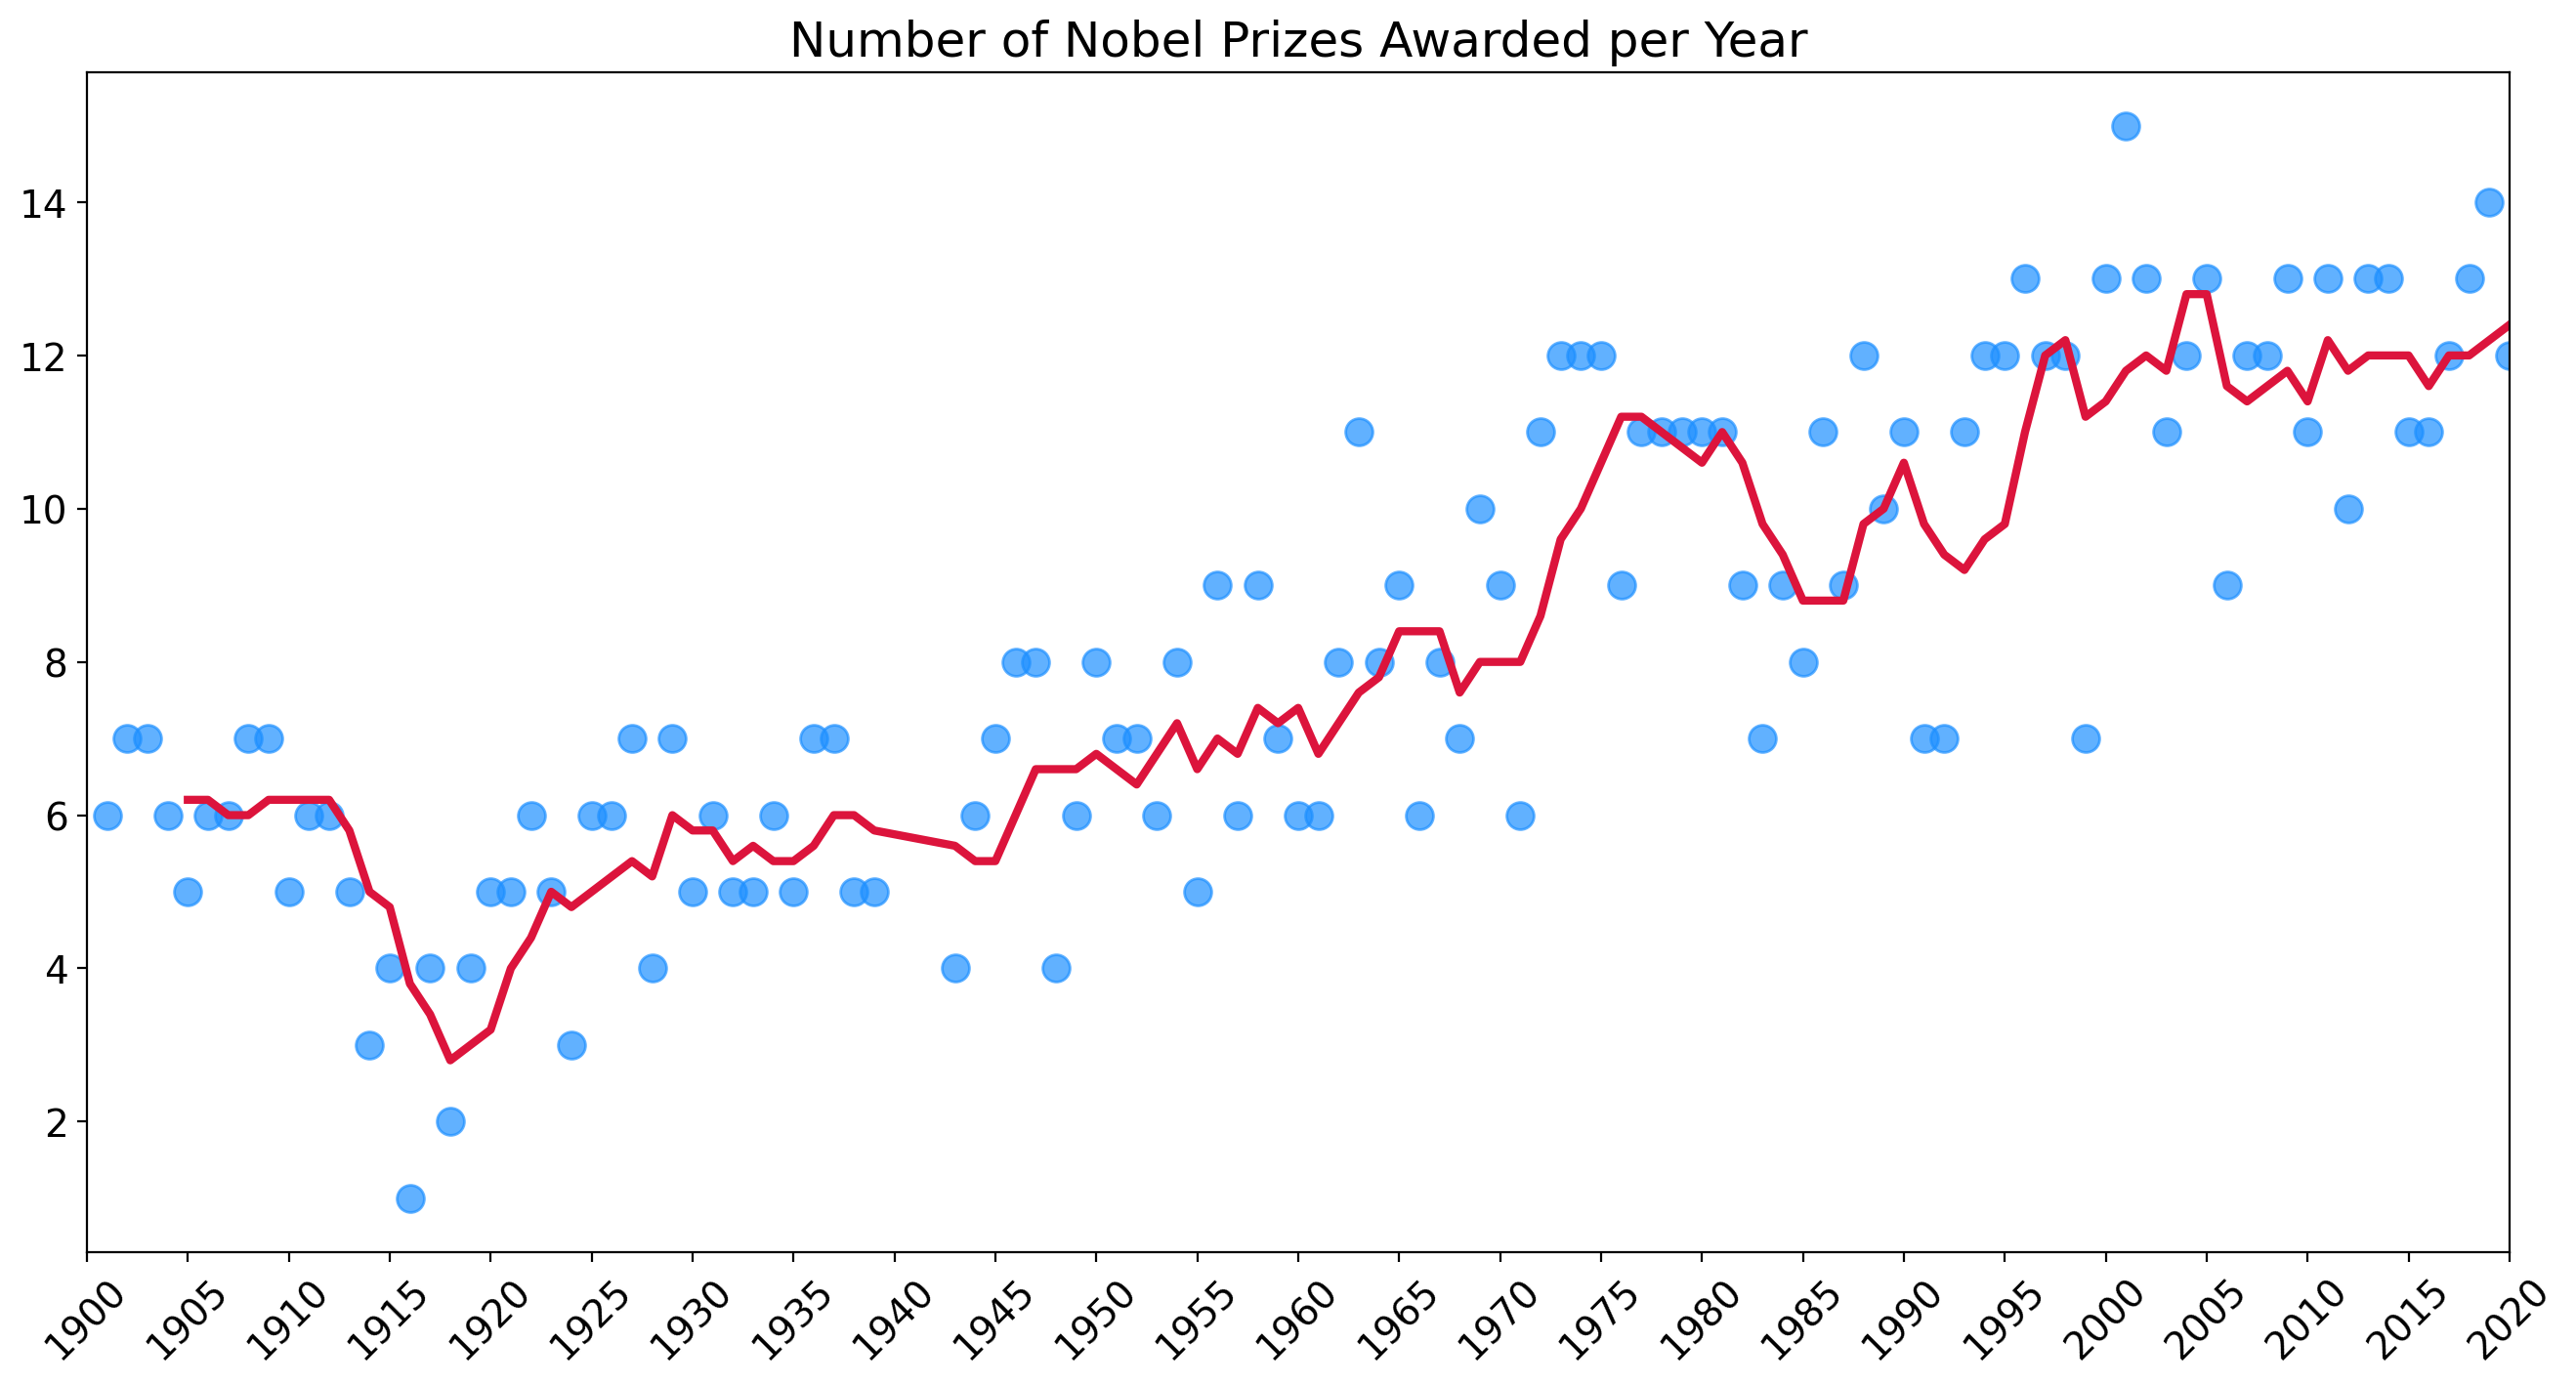

In [20]:
# 시계열 그래프 그리기 
plt.figure(figsize=(16,8), dpi=200)                                 # 그래프 크기 설정 
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)   # 그래프 타이틀 설정
plt.yticks(fontsize=14)                                             # y축 레이블 폰트 사이즈 설정
plt.xticks(ticks=np.arange(1900, 2021, step=5),                     # x축 설정 - x축 범위 설정(1900, 2021, 5년씩 )
           fontsize=14,                                             # 폰트 사이즈
           rotation=45)                                             # x축 년도 마커 각도 설정
 
ax = plt.gca()                                                      # 현재 축 설정
ax.set_xlim(1900, 2020)                                             # x축의 최대 값, 최소값 설정
 
ax.scatter(x=prize_per_year.index,                                  # 산점도 설정 - x축 데이터 설정 
           y=prize_per_year.values,                                 # y축 데이터 설정 
           c='dodgerblue',                                          # 산점도 색상 설정 
           alpha=0.7,                                               # 산점도 투명도 설정
           s=100,)                                                  # 산점도 크기 설정
 
ax.plot(prize_per_year.index,                                       # 라인 설정 - x축 데이터 설정 
        moving_average.values,                                      # y축 데이터 설정 
        c='crimson',                                                # 라인 컬러 설정 
        linewidth=3,)                                               # 라인 두꼐 설정
 
plt.show()

- 산점도가 "수상 회수"를 빨간색 라인은 "5년 이동 평균"을 뜻한다.
- 노벨상 수상 년도 중 1차 세계 대전(1914년 7월 28일 ~ 1918년 11월 11일)과 2차 세계 대전(1939년 9월 1일 ~ 1945년 9월 2일)이 수상 횟수에 영향을 미쳤을까? 확인 결과 1차 세계 대전 기간 중 시상 횟수가 현저히 줄어 들고 있는 것을 볼 수 있다. 그럼 2차 세계 대전은 어떨까? 2차 세계 대전의 경우 약간만 줄었다. 

#### 3-2. 시간에 따른 공동 수상 조사

In [21]:
# 수상자들의 평균 상금 점유율 계산
yearly_avg_share = data.groupby(by='year').agg({'share_pct': pd.Series.mean})
yearly_avg_share

,share_pct
year,
1901,0.833333
1902,0.714286
1903,0.714286
1904,0.833333
1905,1.000000
...,...
2016,0.545455
2017,0.500000
2018,0.461538


In [22]:
# 공동 수상이 얼마나 되는지 5년 연속 평균을 계산
share_moving_average = yearly_avg_share.rolling(window=5).mean()
share_moving_average

,share_pct
year,
1901,NaN
1902,NaN
1903,NaN
1904,NaN
1905,0.819048
...,...
2016,0.522797
2017,0.502797
2018,0.502797


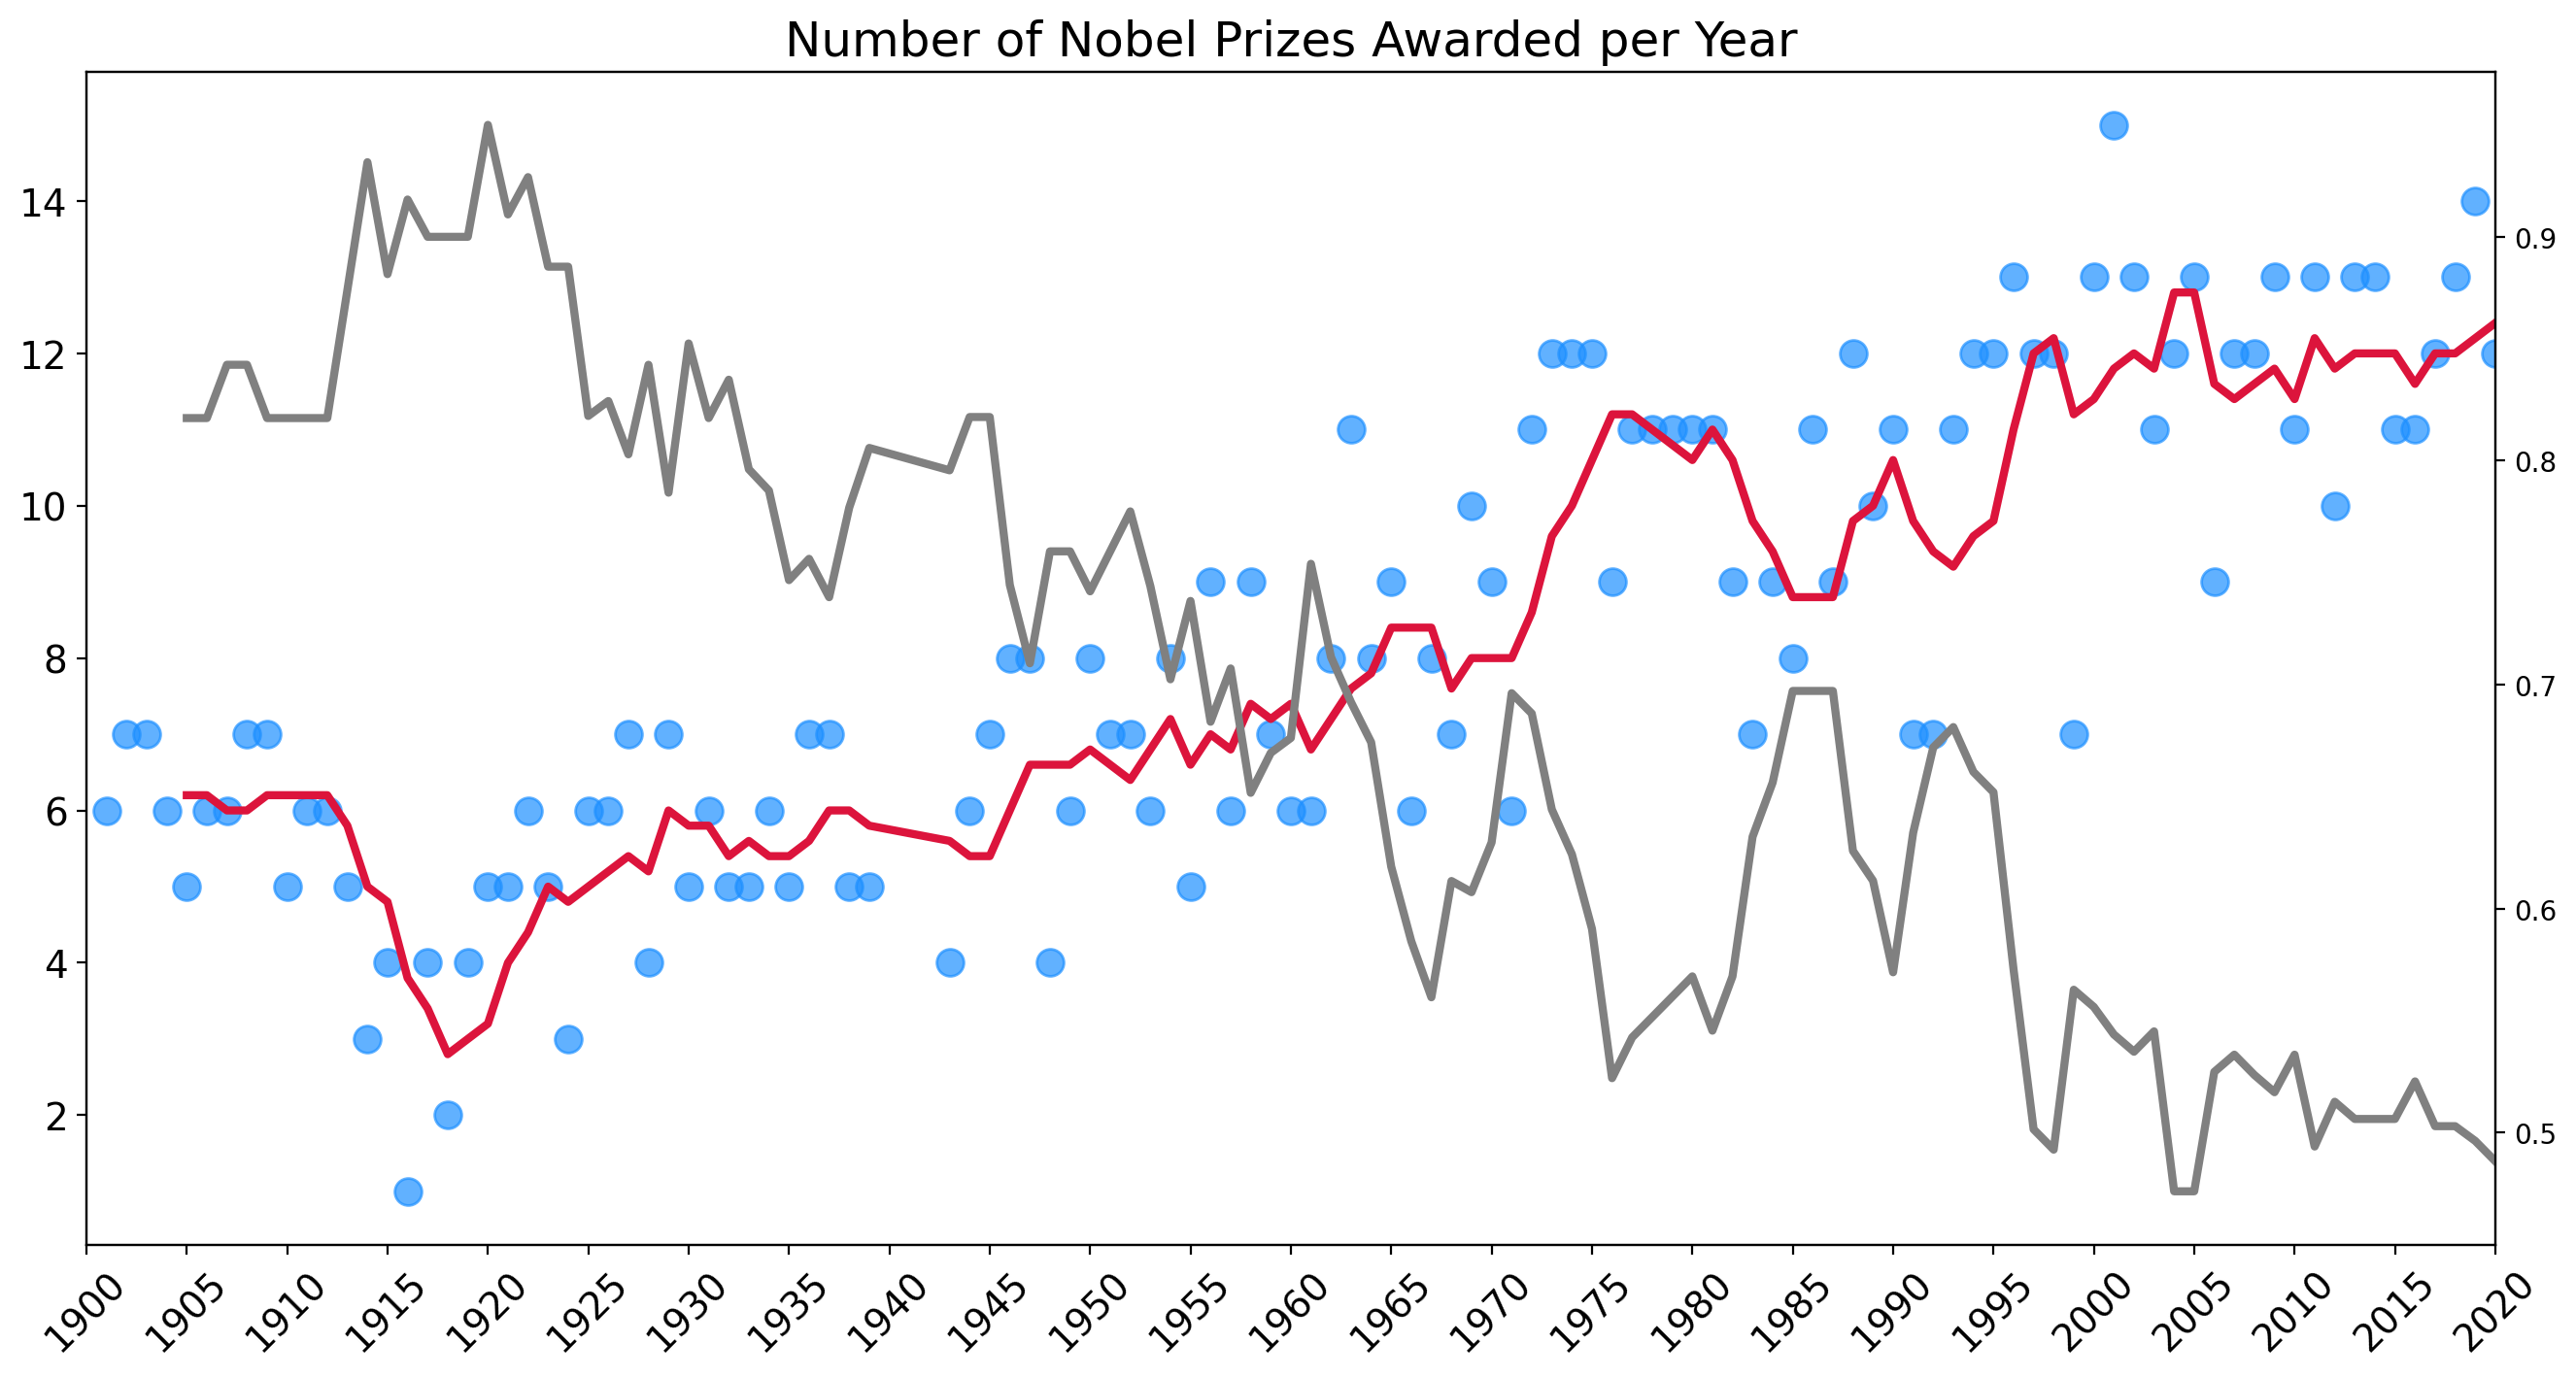

In [23]:
# 시계열 그래프 그리기 
plt.figure(figsize=(16,8), dpi=200)                                 # 그래프 크기 설정 
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)   # 그래프 타이틀 설정
plt.yticks(fontsize=14)                                             # y축 레이블 폰트 사이즈 설정
plt.xticks(ticks=np.arange(1900, 2021, step=5),                     # x축 설정 - x축 범위 설정(1900, 2021, 5년씩 )
           fontsize=14,                                             # 폰트 사이즈
           rotation=45)                                             # x축 년도 마커 각도 설정
 
ax1 = plt.gca()                                                     # 현재 축 설정
ax2 = ax1.twinx()                                                   # 두 번째 y축 설정
ax1.set_xlim(1900, 2020)                                            # x축의 최대 값, 최소값 설정

ax1.scatter(x=prize_per_year.index,                                 # 산점도 설정 - x축 데이터 설정 
           y=prize_per_year.values,                                 # y축 데이터 설정 
           c='dodgerblue',                                          # 산점도 색상 설정 
           alpha=0.7,                                               # 산점도 투명도 설정
           s=100)                                                   # 산점도 크기 설정
 
ax1.plot(prize_per_year.index,                                      # 라인 설정 - x축 데이터 설정 
        moving_average.values,                                      # y축 데이터 설정 
        c='crimson',                                                # 라인 컬러 설정 
        linewidth=3)                                                # 라인 두꼐 설정
 
ax2.plot(prize_per_year.index,                                      # 두 번쨰 y축 라인 차트 설정 - x축 데이터 설정 
        share_moving_average.values,                                # y축 데이터 설정 
        c='grey',                                                   # 라인 컬러 설정 
        linewidth=3)                                                # 라인 두꼐 설정
    
plt.show()

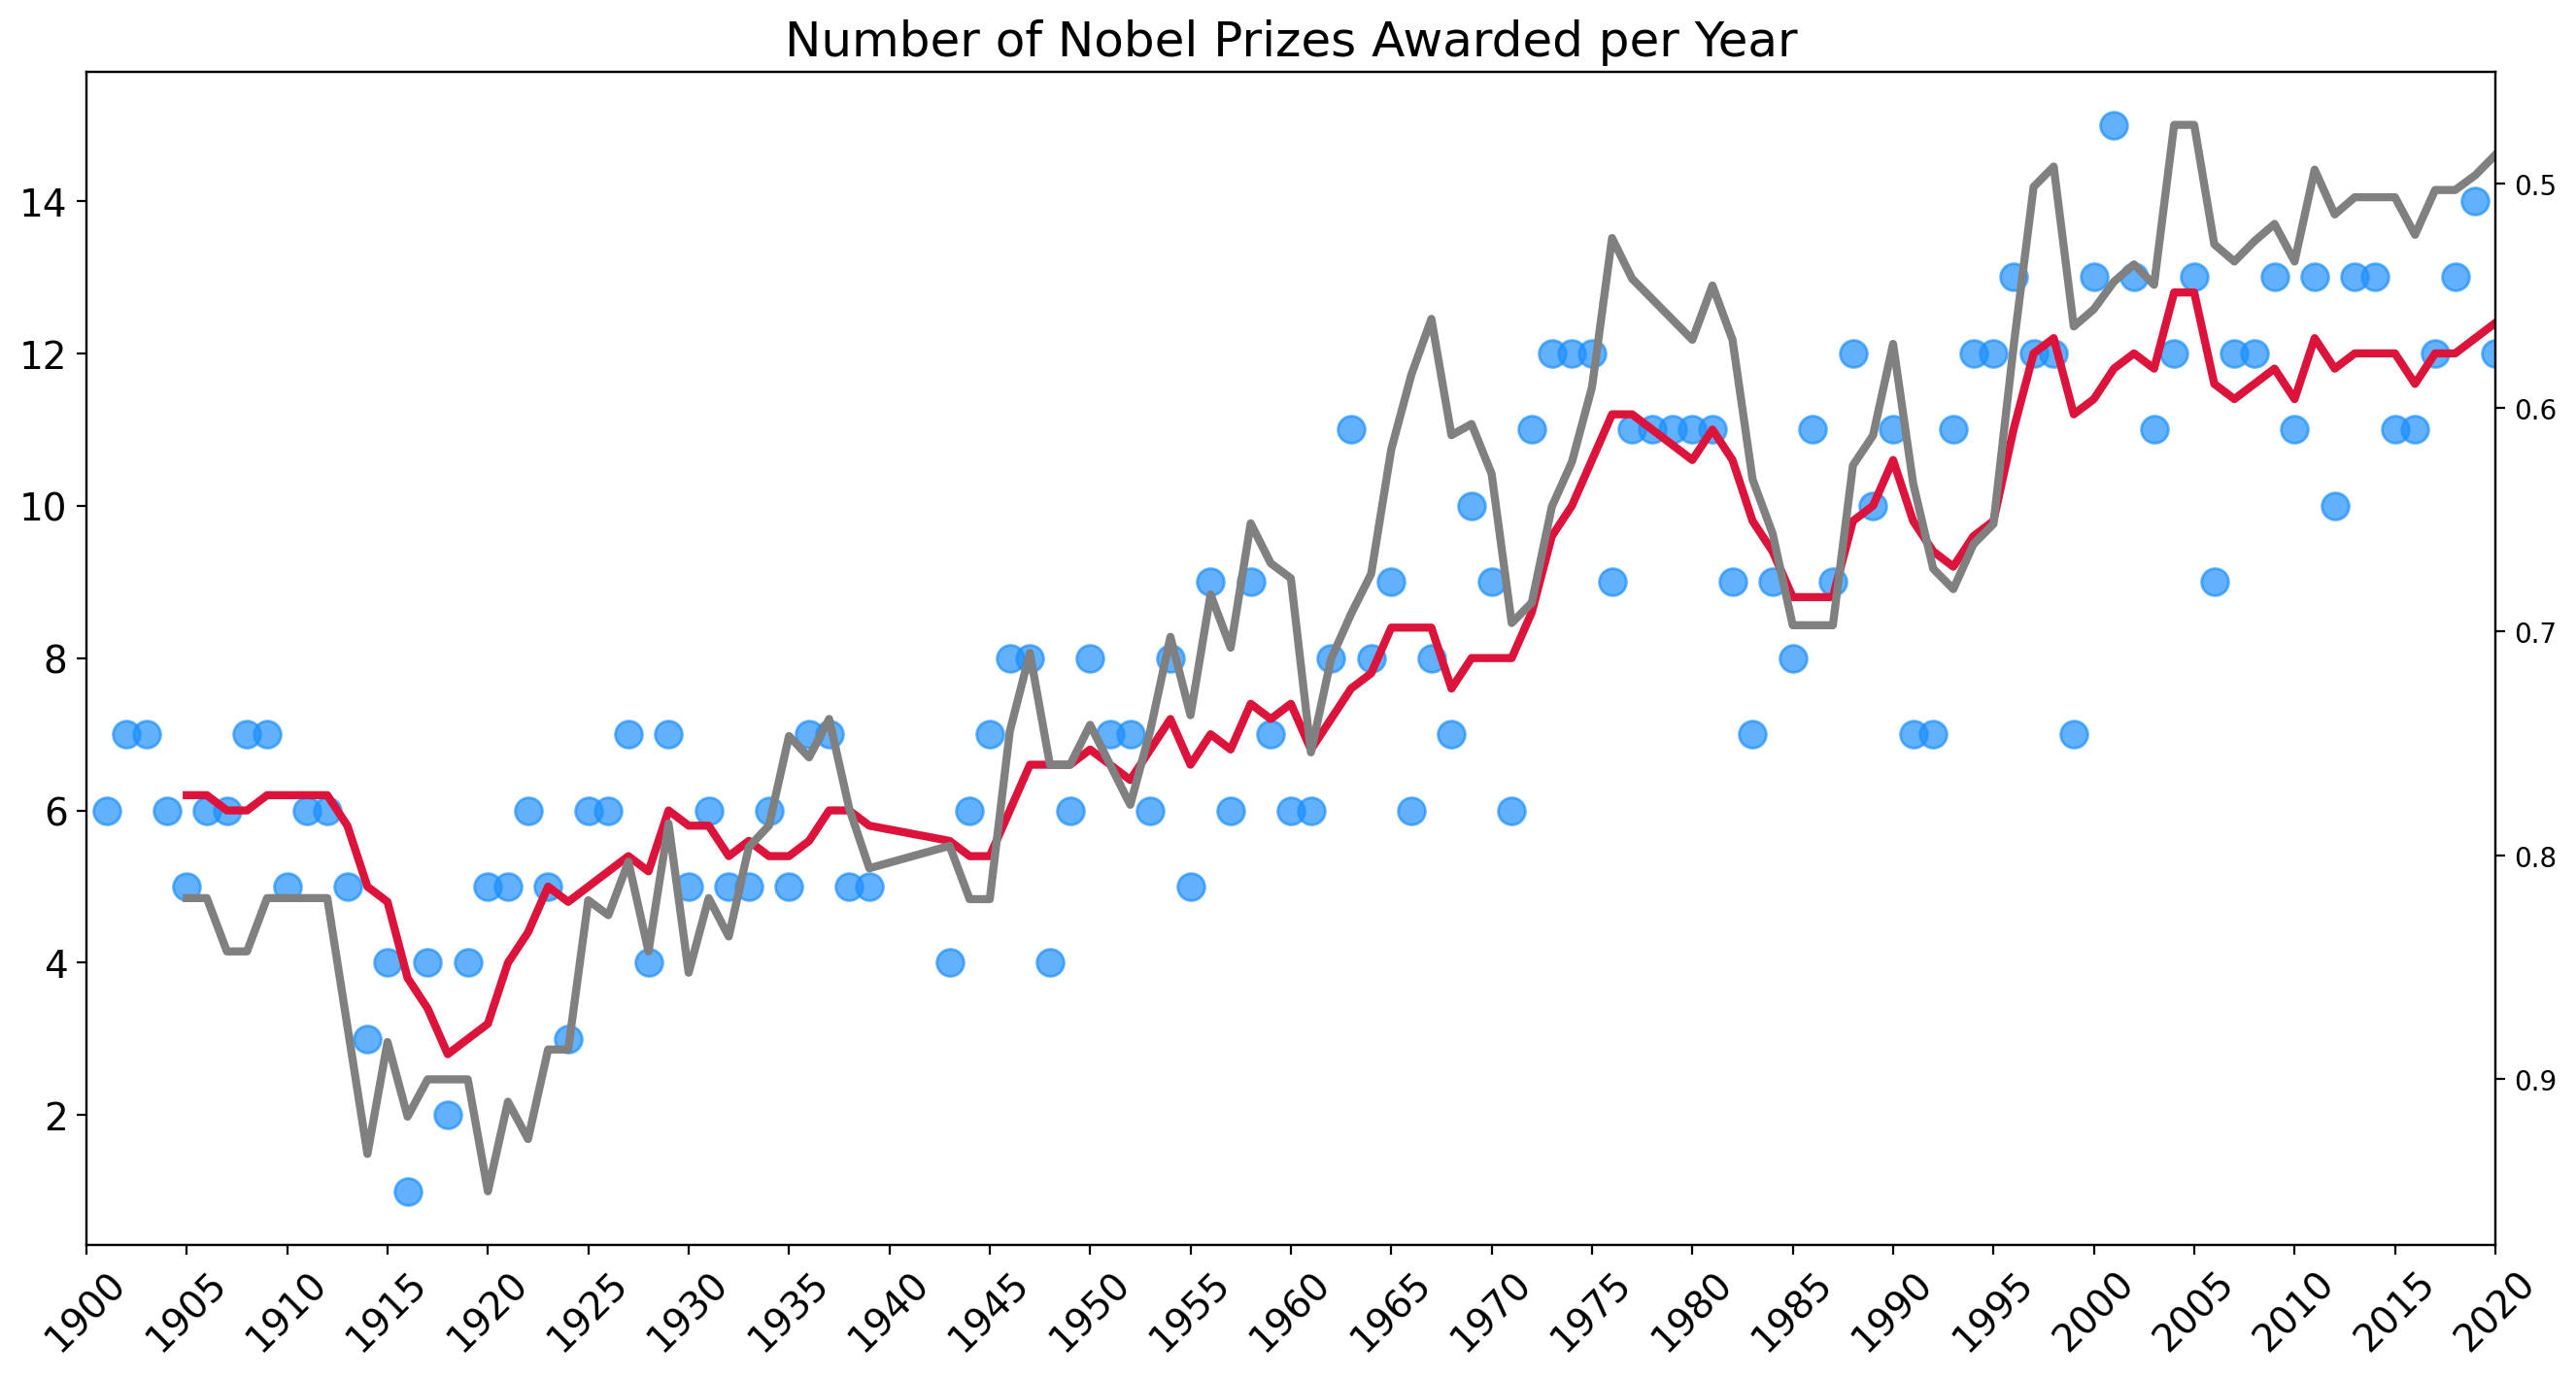

In [24]:
# 시계열 그래프 그리기 - 두 번째 y축 반전
plt.figure(figsize=(16,8), dpi=200)                                 # 그래프 크기 설정 
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)   # 그래프 타이틀 설정
plt.yticks(fontsize=14)                                             # y축 레이블 폰트 사이즈 설정
plt.xticks(ticks=np.arange(1900, 2021, step=5),                     # x축 설정 - x축 범위 설정(1900, 2021, 5년씩 )
           fontsize=14,                                             # 폰트 사이즈
           rotation=45)                                             # x축 년도 마커 각도 설정
 
ax1 = plt.gca()                                                     # 현재 축 설정
ax2 = ax1.twinx()                                                   # 두 번째 x축 설정
ax1.set_xlim(1900, 2020)                                            # x축의 최대 값, 최소값 설정

ax2.invert_yaxis()                                                  # 두 번째 y축 

ax1.scatter(x=prize_per_year.index,                                 # 산점도 설정 - x축 데이터 설정 
           y=prize_per_year.values,                                 # y축 데이터 설정 
           c='dodgerblue',                                          # 산점도 색상 설정 
           alpha=0.7,                                               # 산점도 투명도 설정
           s=100)                                                   # 산점도 크기 설정
 
ax1.plot(prize_per_year.index,                                      # 라인 설정 - x축 데이터 설정 
        moving_average.values,                                      # y축 데이터 설정 
        c='crimson',                                                # 라인 컬러 설정 
        linewidth=3)                                                # 라인 두꼐 설정
 
ax2.plot(prize_per_year.index,                                      # 두 번쨰 x축 라인 차트 설정 - x축 데이터 설정 
        share_moving_average.values,                                # y축 데이터 설정 
        c='grey',                                                   # 라인 컬러 설정 
        linewidth=3)                                                # 라인 두꼐 설정
    
plt.show()

- 산점도가 "수상 회수"를 빨간색 라인은 "5년 이동 평균"를 회색 라인이 "공동 수상 5년 이동 평균"을 뜻한다. 
- 차트를 보면, 더 많은 공동 수상자가 생겨나면서 수상자는 증가한다. 또한 1969년 부터는 경제학 부문도 추가되기 때문에 더 많은 노벨상이 수여된다. 
- 그리고 1차, 2차 세계 대전 동안은 매우 적은 상만 수여 된 것을 볼 수 있다. (해당 해에는 0개의 항목을 표시 하는 대신, 파란점이 누락된 것을 볼 수 있다)

### 4. 단계 구분도와 최다 수상 국가

#### 4-1. 최다 수상 국가 시각화

In [25]:
# 최다 수상 top20 국가 만들기
top_countries = data.groupby(['birth_country_current'], 
                                  as_index=False).agg({'prize': pd.Series.count})

top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


- 데이터프레임을 보면, 해당 순위를 생성하기 위해 "birth_country", "birth_country_current", "organization_country" 중 하나의 열을 사용할 수 있다. 하지만 이들은 각각의 문제와 한계가 있다. 
- "birth_country" 항목의 경우, 몇몇 국가는 더 이상 존재하지 않음을 확인할 수 있다(예를 들면 소비에트 연방 혹은 체코슬로바키아 같은 곳들). 
- 따라서 "birth_country_current" 항목을 사용하는 것이 더 좋다. 왜냐하면, 이 항목은 수상자가 태어난 도시가 속한 국가를 나타낸다. 
- 앞으로 있을 분석을 함에 있어서 우리가 인지해야 할 것은, 어떤 데이터를 사용해야하는지 정확하게 인지하고 있어야 한다.

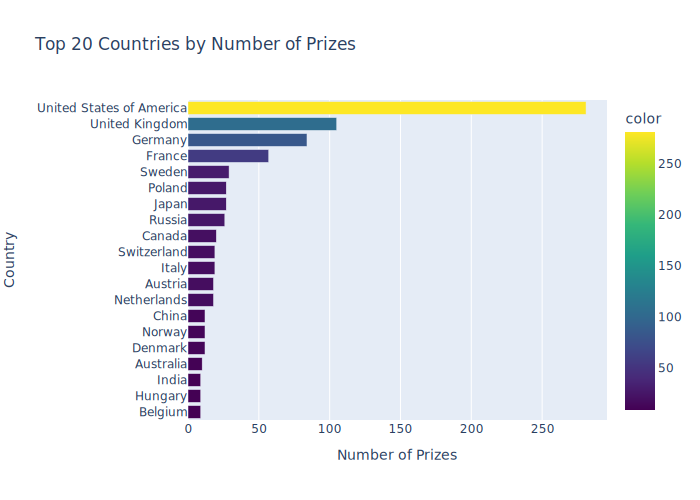

In [26]:
# 수평 막대 차트로 시각화 
h_bar = px.bar(x=top20_countries.prize,                           # x축 데이터
               y=top20_countries.birth_country_current,           # y축 데이터
               orientation='h',                                   # 수평 설정 
               color=top20_countries.prize,                       # 컬러 설정 - 기준 prize
               color_continuous_scale='Viridis',                  # 불연속성 그래프르이 색 지정 
               title="Top 20 Countries by Number of Prizes")      # 제목 설정

h_bar.update_layout(xaxis_title="Number of Prizes",               # x축 레이블 설정 
                    yaxis_title='Country')                        # y축 레이블 설정


h_bar.show(renderer='svg')

- 출력 결과 노벨상 최다 수상 국가는 미국(281개), 영국(105개), 독일(84개) 순이다. 

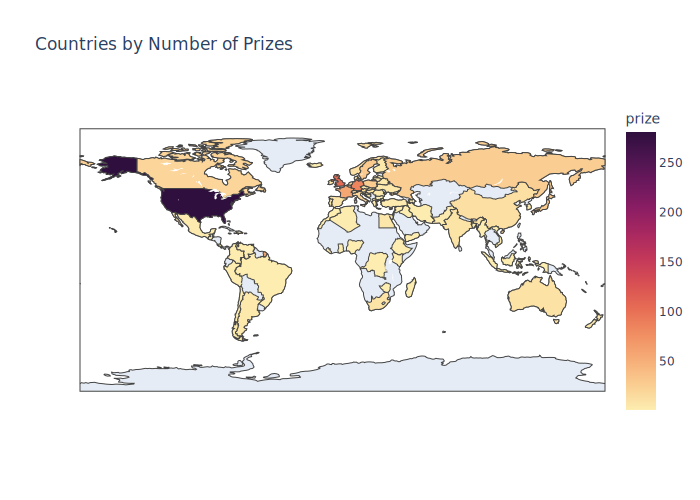

In [27]:
# 지도로 표시
prize_countries = data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})   # 지도에 표시하기 위해 ISO를 추가해서 다시 그룹바이 진행

fig = px.choropleth(prize_countries,                                          # 사용할 데이터 설정 
                   locations="ISO",                                           # 위치 
                   color="prize",                                             # 컬러 기준 - 수상 회수 
                   hover_name="birth_country_current",                        # 볼드체로 이름 표시 - 국가명 기준
                   color_continuous_scale=px.colors.sequential.matter,        # 지도 컬러 선택 
                   title="Countries by Number of Prizes")                     # 제목 설정

fig.update_layout(coloraxis_showscale=True)                                   # potly express로 생성된 히트맵 색상 축 눈금 표시

fig.show(renderer='svg')

#### 4-2.  국가별 수상 분야

In [28]:
# 국가의 수상 횟수를 부문별로 집계 
cat_country = data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})  # 국가, 카테고리 기준 그룹 바이 후 prize 기준으로 count 집계
cat_country.sort_values(by='prize', ascending=False, inplace=True)                                                 # prize 기준으로 내림차순 정렬
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [29]:
# 최다 수상 국가 top 20 데이터와 국가 수상 횟수 부문별 집계 데이터 merge 
merged_data = pd.merge(cat_country, top20_countries, on='birth_country_current')            # 두 데이터 머지 
merged_data.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']     # 컬럼명 변경
merged_data.sort_values(by='total_prize', inplace=True)                                     # 'total_prize'기준으로 정렬 한 뒤 원본 대체
merged_data

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


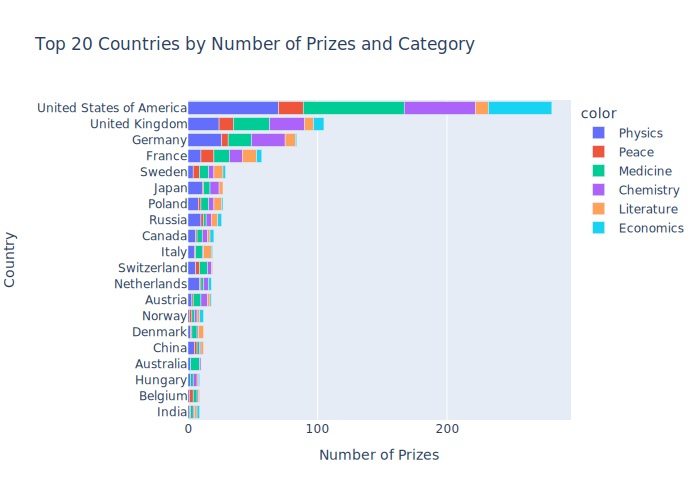

In [30]:
# bar chart 그리기 - 국가별 최다 수상 및 분야별 수상 시각화 
cat_cntry_bar = px.bar(x=merged_data.cat_prize,                                    # x축 설정 - 카테고리 별 수상 회수 
                       y=merged_data.birth_country_current,                        # y축 설정 - 국가 
                       color=merged_data.category,                                 # 컬러 설정 - 카테고리 기준
                       orientation='h',                                            # 회전축 설정 - 가로형으로 바꾸기 
                       title='Top 20 Countries by Number of Prizes and Category'   # 제목 설정 
                      )

cat_cntry_bar.update_layout(xaxis_title='Number of Prizes',                        # x축 레이블 설정 
                            yaxis_title='Country')                                 # y축 레이블 설정 

cat_cntry_bar.show(renderer='svg')

- 국가별로 막대 차트를 범주별로 다시 나누면, 데이터를 매우 세밀하게 볼 수 있다. 
- 현재까지 확인된 사항은 아래와 같다. 
    1. 미국이 경제학 분야에서 엄청난 부분을 차지했다는 것을 확인 할 수 있다. 반면, 일본과 독일은 경제학 수상자가 거의 없거나 아예 없다. 
    2. 미국은 프랑스의 전 분야 수상 횟수보다 물리학이나 의학 분야에서의 수상 횟수가 더 많다. 
    3. 물리학에서 독일은 영국보다 수상 횟수가 더 많으며, 총 수상 횟수는 프랑스보다 많지만, 평화상과 문학상은 프랑스가 독일에 비해 수상 횟수가 많다.

#### 4-3. 시간에 따른 국가별 수상 수

In [31]:
# 국가별 수상 횟수를 연도별로 세기 
prize_by_year = data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [32]:
# 누적 수상 횟수 정렬 
cumulative_pirzes = prize_by_year.groupby(by=['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_pirzes.reset_index(inplace=True) 
cumulative_pirzes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


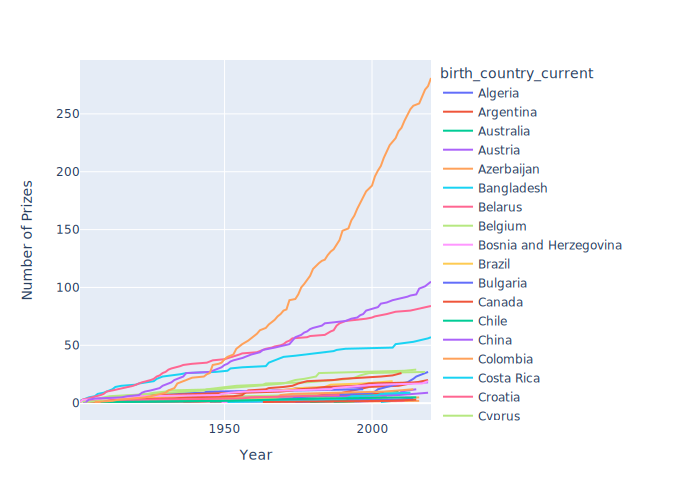

In [33]:
# 시각화 - line chart 
l_chart = px.line(cumulative_pirzes,                           # 데이터 설정
                  x='year',                                    # x축 설정 
                  y='prize',                                   # y축 설정 
                  color='birth_country_current',               # 컬러 설정 - birth_country_current 기준
                  hover_name='birth_country_current')          # 볼드체로 이름 표시 - birth_country_current 기준

l_chart.update_layout(xaxis_title='Year',                      # x축 레이블 설정 
                      yaxis_title='Number of Prizes')          # y축 레이블 설정 

l_chart.show(renderer='svg')

- 유럽을 폐허로 만든 2차 세계 대전 이후, 미국이 크게 도약한 것을 할 수 있다. 그 전의 노벨상은 거의 유럽의 독무대 였다. 
- 영국과 독일이 70년대와 90년대에 서로 위치가 바뀐것을 확인 할 수 있다. (영국이 70년대 부터 수상자가 독일보다 많아 지기 시작한다.) 
- 스웨덴은 수십년 동안 꾸준히 5위의 자리를 차지하고 있는 것도 주목할 만하다.

### 5. 연구 위치의 상세한 지역 분석을 위한 선버스트 차트 그리기

#### 5-1. 노벨상 수상자가 소속된 상위 연구 조직

In [34]:
# 최다 수상 top20 기관 데이터 만들기
top_organization = data.groupby(['organization_name'], 
                                  as_index=False).agg({'prize': pd.Series.count})

top_organization.sort_values(by='prize', inplace=True)
top20_organization = top_organization[-20:]
top20_organization

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


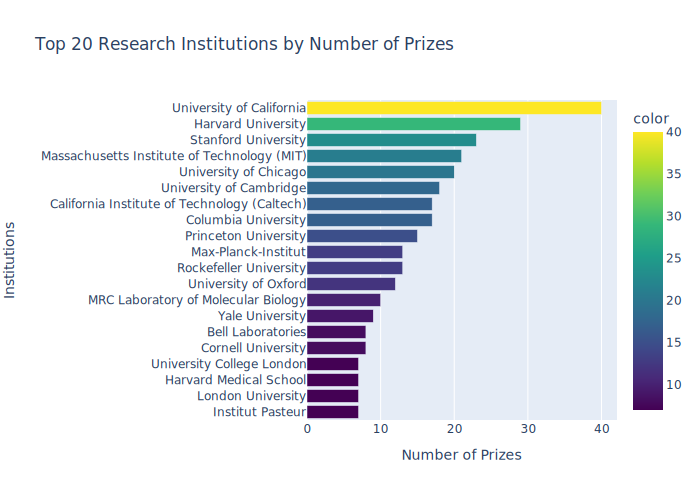

In [35]:
# 수평 막대 차트로 시각화 
h_bar = px.bar(x=top20_organization.prize,                                    # x축 데이터
               y=top20_organization.organization_name,                        # y축 데이터
               orientation='h',                                               # 수평 설정 
               color=top20_organization.prize,                                # 컬러 설정 - 기준 prize
               color_continuous_scale='Viridis',                              # 불연속성 그래프르이 색 지정 
               title="Top 20 Research Institutions by Number of Prizes")      # 제목 설정

h_bar.update_layout(xaxis_title="Number of Prizes",                           # x축 레이블 설정 
                    yaxis_title='Institutions')                               # y축 레이블 설정


h_bar.show(renderer='svg')

- 상위 20개 조직은 위와 같으며, 대부분 미국 연구 기관에서 많이 나왔다.
- 시카고 대학에 속한 노벨상 수상자는 20명, 하버드 대학에 속한 노벨상 수상자는 29명으로 나타났다.

#### 5-2. 노벨상 수상자가 소속된 연구 도시

In [36]:
# 최다 수상 top20 도시 데이터 만들기
top_city = data.groupby(['organization_city'], 
                                  as_index=False).agg({'prize': pd.Series.count})

top_city.sort_values(by='prize', inplace=True)
top20_city = top_city[-20:]
top20_city

,organization_city,prize
65,Göttingen,8
186,Zurich,8
71,Heidelberg,9
119,"New Haven, CT",9
110,Munich,9
23,"Boston, MA",9
108,Moscow,10
157,Stockholm,10
126,Oxford,12
13,Berlin,12


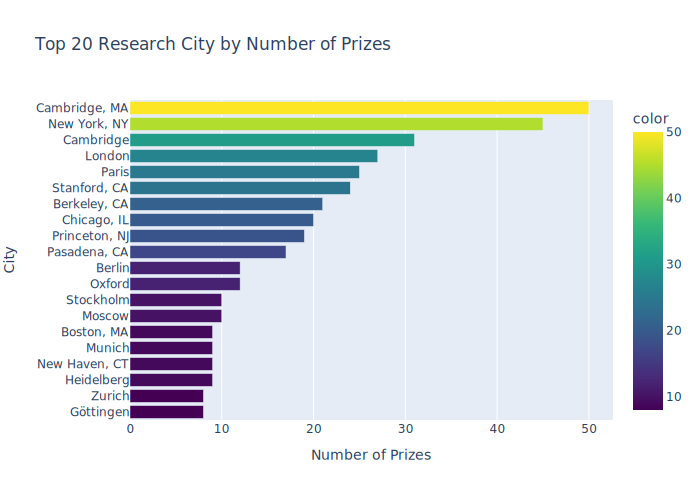

In [37]:
# 수평 막대 차트로 시각화 
h_bar = px.bar(x=top20_city.prize,                                    # x축 데이터
               y=top20_city.organization_city,                        # y축 데이터
               orientation='h',                                       # 수평 설정 
               color=top20_city.prize,                                # 컬러 설정 - 기준 prize
               color_continuous_scale='Viridis',                      # 불연속성 그래프르이 색 지정 
               title="Top 20 Research City by Number of Prizes")      # 제목 설정

h_bar.update_layout(xaxis_title="Number of Prizes",                   # x축 레이블 설정 
                    yaxis_title='City')                               # y축 레이블 설정


h_bar.show(renderer='svg')

- 노벨상 수상자 소속 연구 기관이 있는 도시는 위와 같다. 
- 발견이 많이 된 도시는 메사추세츠주의 케임브리지 이다. 
- 유럽의 경우 영국의 케임브리지 도시이다.

#### 5-3. 노벨상 수상자 출생 도시

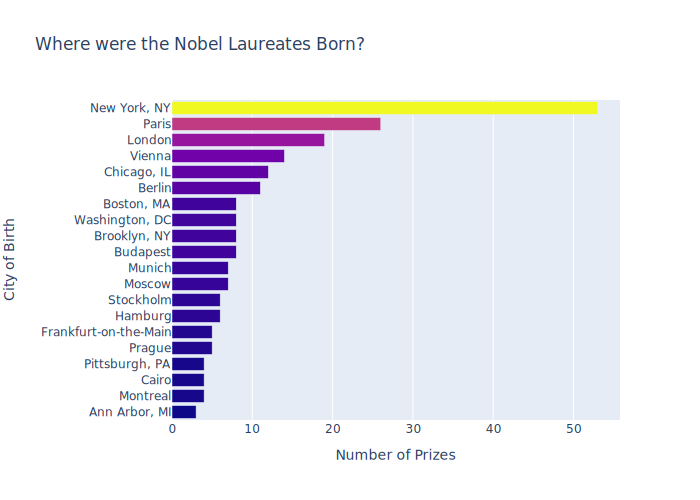

In [38]:
top20_cities = data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show(renderer='svg')

- 인구가 많으면 확실히 노벨상 수상자의 출생지일 확률이 높다. 뉴욕, 파리, 런던은 모두 인구가 아주 많은 도시이다. 
- 하지만 비엔나와 부다페스트는 그렇지 않지만 많은 수상자를 배출했다. 획기적인 연구의 상당수는 큰 인구 중심지에서 이뤄지지 않는다. 따라서 출생 도시 목록은 위 목록과 상당히 다르다. 
- 매사추세츠주 케임브리지, 스탠퍼드, 버클리, 영국 케임브리지는 모두 많은 발견이 있었던 장소지만 수상자들의 출생지는 아니다.

#### 5-4. 수상횟수 조직에 따라 선버스트 차트로 나타내기 

In [39]:
country_city_org = data.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})
 
country_city_org = country_city_org.sort_values('prize', ascending=False)
country_city_org

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19
...,...,...,...,...
110,Japan,Sapporo,Hokkaido University,1
111,Japan,Tokyo,Asahi Kasei Corporation,1
112,Japan,Tokyo,Kitasato University,1
113,Japan,Tokyo,Tokyo Institute of Technology,1


In [40]:
burst = px.sunburst(
    country_city_org,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize',
    title='Where do Discoveries Take Place?'
)

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show(renderer='svg')

- 프랑스는 대표적으로 한 도시에 집중되어 있는 나라이다. 사실상 노벨상 수상자가 속한 모든 조직이 파리에 있다. 
- 그에 반해 독일의 과학적 발견들은 훨씬 더 전역에 퍼져 있다. 
- 영국의 경우에는 주로 케임브리지와 런던에 있다.

### 6. 수상자의 수상 연령에서 패턴 찾아내기 

#### 6-1. 수상 당시 나이 계산

In [41]:
# 수상 당시 나이 계산하기
data['winning_age'] = data.year - data.birth_date.dt.year
data

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.000000,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.000000,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.000000,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.500000,79.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.500000,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR,0.333333,71.0
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,0.250000,55.0
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,0.250000,68.0


#### 6-2. 최고령 및 최연소 수상자 

In [42]:
# 최고령 최연소 수상자 추출
display(data.nlargest(n=1, columns='winning_age'))      # 최고령 
display(data.nsmallest(n=1, columns='winning_age'))     # 최연소

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.333333,97.0


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.5,17.0


- "존 구디너프"는 노벨상을 받을 때 97세였다. 흥미롭게도 존은 미국인 부모님이 독일에 있을 때 태어났다. 미국인이지만 ‘독일’의 상으로 계산한 한 예 중 하나이다. 

#### 6-3. 기술 통계와 히스토그램 

In [43]:
# 나이열 통계 수치 추출 
data.winning_age.describe()

count    934.000000
mean      59.948608
std       12.617785
min       17.000000
25%       51.000000
50%       60.000000
75%       69.000000
max       97.000000
Name: winning_age, dtype: float64

- "describe()" 함수를 사용하는 것은 특정 열의 숫자가 어떻게 분포하는지에 대해 감을 잡을 수 있는 방법 중 하나이다. 
- 하지만 분포를 보기 위해 볼 수 있는 시각화 방법은 히스토그램으로 시각화 하는 것이다. 

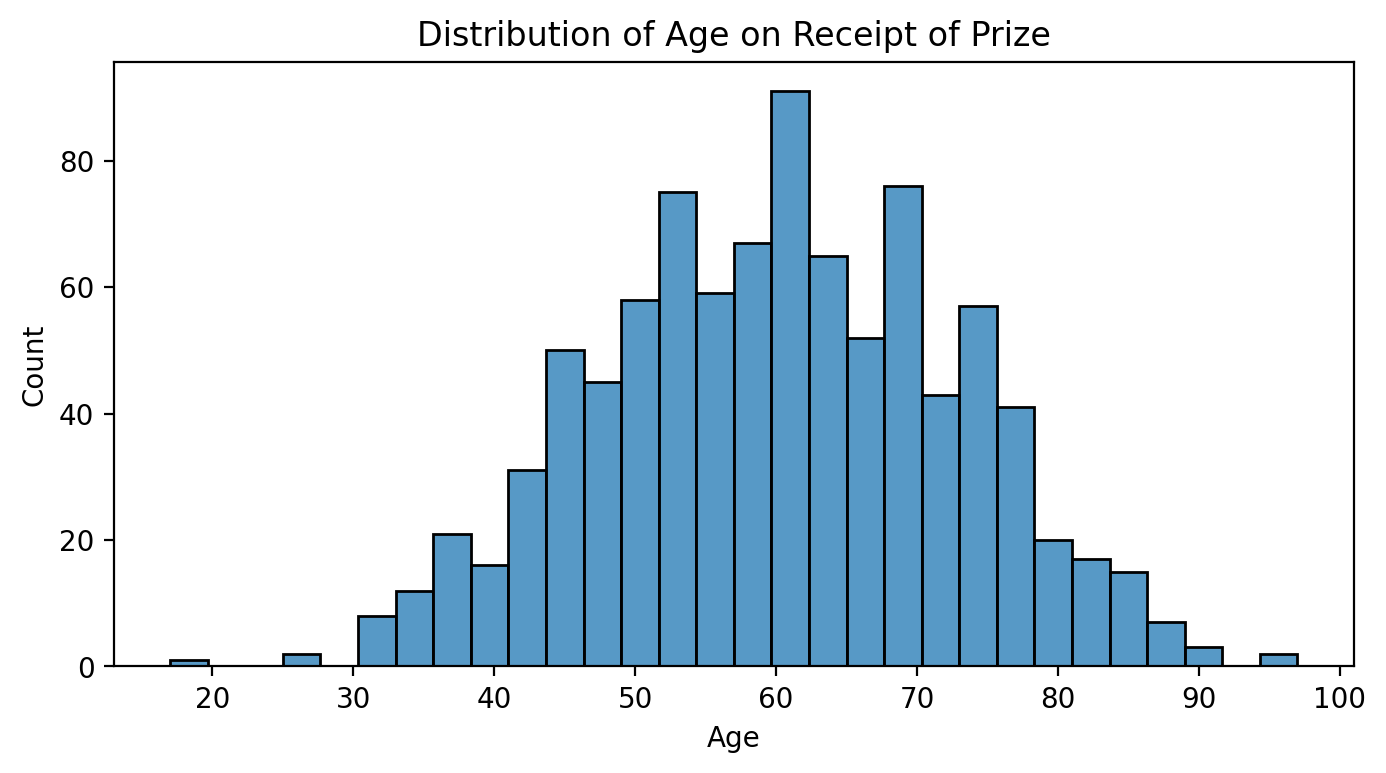

In [44]:
# 히스토그램 시각화
plt.figure(figsize=(8, 4), dpi=200)

sns.histplot(data=data,
             x=data.winning_age,
             bins=30)

plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

- 위 히스토그램은 전 기간에 대해 데이터셋 전체의 분포를 보여준다. 하지만 시간이 지나면서 수상자 나이가 변화되었을지도 모른다.

#### 6-4. 수상자 나이의 변화 (모든 분야)

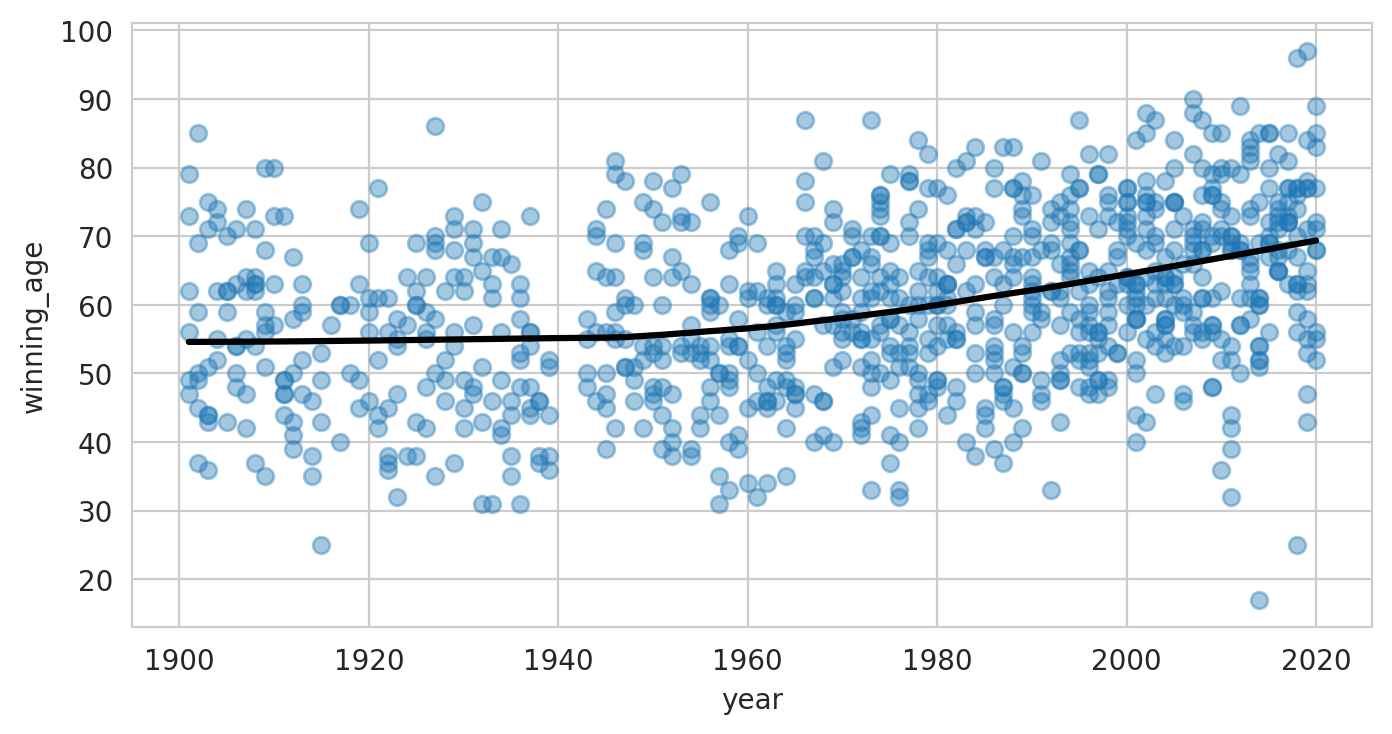

In [45]:
# 선형 회귀 그래프 그리기
plt.figure(figsize=(8, 4), dpi=200)                  # matplotlib.pyplot에서 figure 함수를 사용하여 새로운 그림(figure)을 생성 - 크기 및 해상도 설정 
with sns.axes_style('whitegrid'):                    # 그래프 스타일 설정 - whitegrid
    # 산점도 그래프 & 회귀선 생성
    sns.regplot(data = data,                         # 데이터 설정 
                x='year',                            # x축 데이터 설정 
                y='winning_age',                     # y축 데이터 설정 
                lowess=True,                         # 산점도에 대해 로컬 가중 평균을 사용하여 부드러운 회귀선을 그림 (국소 선형 회귀)
                scatter_kws = {'alpha': 0.4},        # 산점도 스타일 설정 - 투병도 0.4 설정 
                line_kws={'color': 'black'})         # 회귀선 스타일 설정 - 검정색으로 지정
    
plt.show()

- lowess 매개변수를 이용하면, 국소 선형 회귀를 그릴 수 있다. 회귀선은 선형이지만 전체 데이터에 걸쳐 비선형 모양인 이동 평균에 가깝다. 
- 이것은 노벨상 수상자들이 갈수록 말년에 상을 받는 것을 분명히 보여준다. 
- 1900년에서 약 1950년까지는 수상자들이 약 55세였지만 요즘 수상자들은 수상할 때 70세에 가깝다.
- 또한 차트에서 알 수 있는 것은 최근 10년 동안 범위가 넓어졌다는 사실이다. 아주 어린 수상자와 나이가 아주 많은 수상자가 많아졌다. 
- 1950년대와 1960년대의 수상자들은 30세에서 80세 사이였으므로, 범위가 더 넓어졌다.

#### 6-5. 분야별 나이 차이 

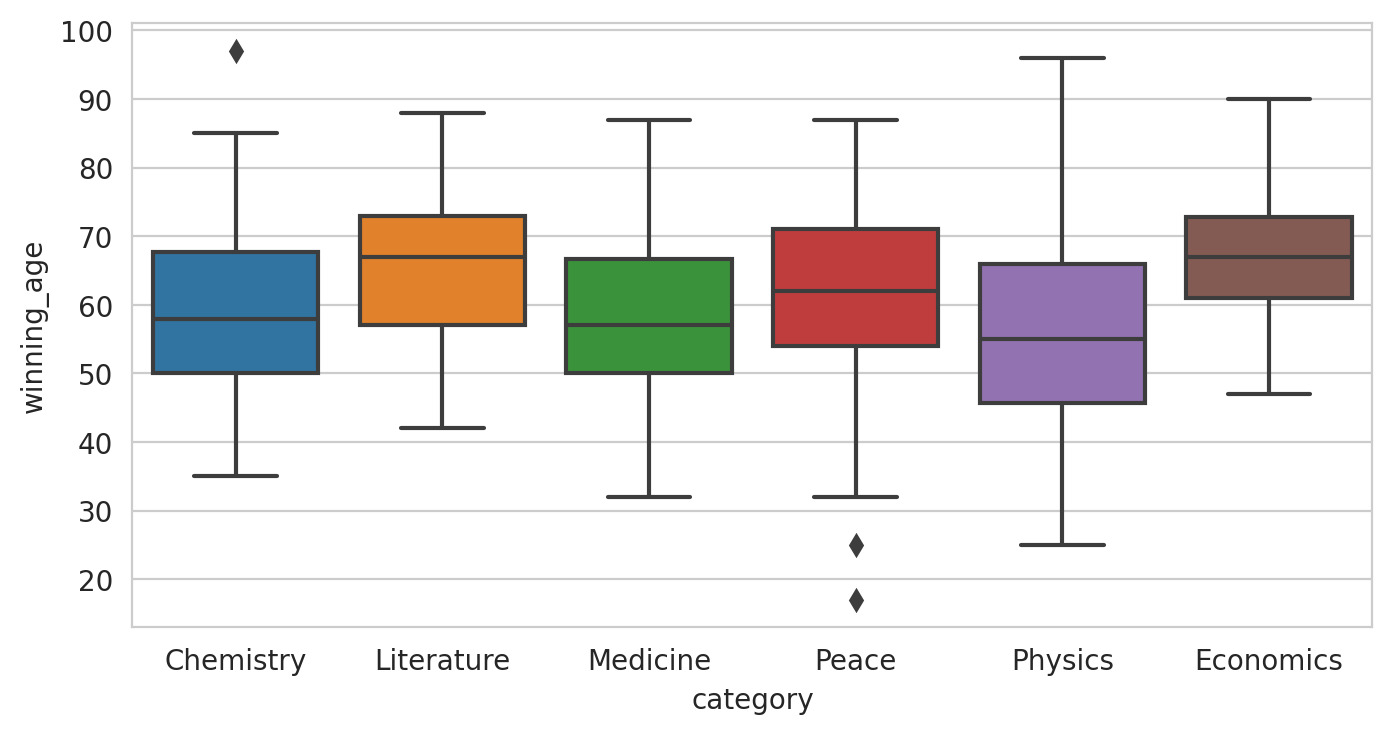

In [47]:
# box plot으로 분야별 나이 시각화 나타내기
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.boxplot(data=data,
                x='category',
                y='winning_age')

plt.show()

- box plot은 평균, 사분위수, 최댓값, 최솟값을 보여준다. 위 그래프를 보면서 흥미로운 궁금증이 생긴다. 
- '평화상 수상자는 정말 물리학 수상자 보다 나이가 많을까?'

#### 6-6. 분야별 수상자 나이 변화

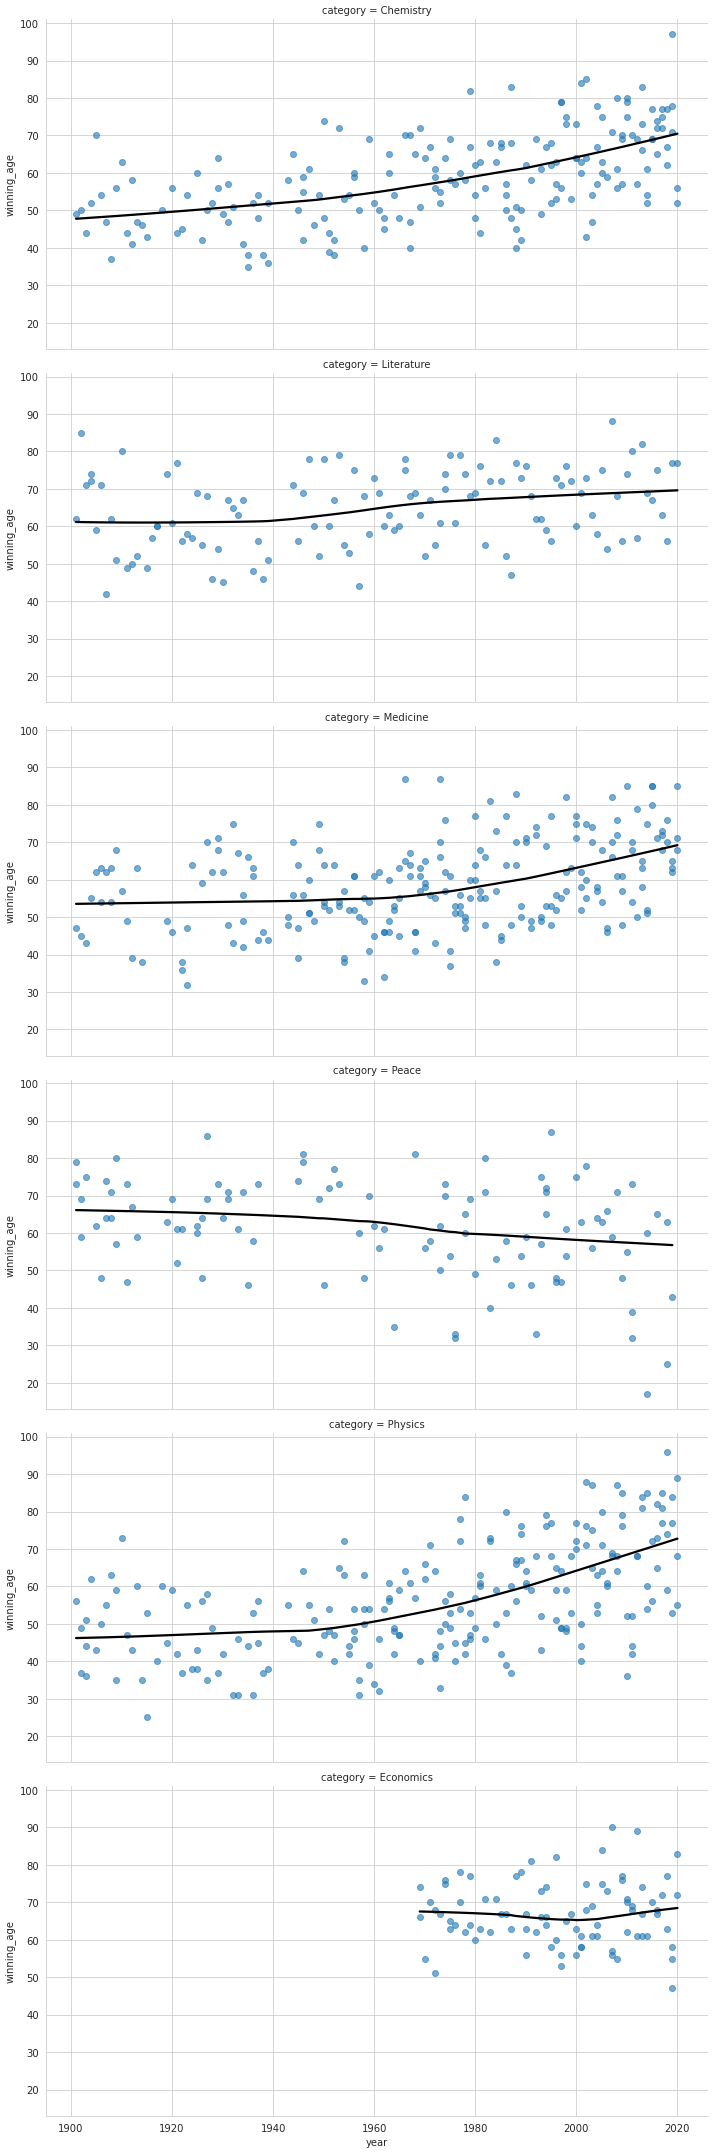

In [48]:
# 산점도와 회귀선 동시에 그리기 - lmplot
with sns.axes_style('whitegrid'):                 # 그래프 스타일 설정 - whitegrid
    # 산점도와 회귀선을 가진 서브플롯 그래프를 생성
    sns.lmplot(data=data,                         # 데이터 설정 
               x='year',                          # x축 데이터 설정 
               y='winning_age',                   # y축 데이터 설정 
               row='category',                    # 여러 서브 플롯 생성 - 기준 'category'
               lowess=True,                       # 각 서브 플롯에 대해 로컬 가중 편균을 사용하여 부드로운 회귀선 그리기 
               aspect=2,                          # 각 서브플롯의 가로 세로 비율 설정 - 여기서는 가로 2배, 세로 1배 
               scatter_kws={'alpha': 0.6},        # 산점도 스타일 설정 - 투명도
               line_kws={'color': 'black'})       # 회귀선 스타일 설정 - 색상  
    
plt.show()

- 물리학, 화학, 의학 분야 수상자가 시간이 지나면서 나이가 많아지는 것을 볼 수 있는데, 특히 물리학이 가장 강하다. 평균 나이가 50세 아래였지만, 최근 기준으로 70세 이상으로 증가했다.
- 가장 새로운 분야인 경제학은 상대적으로 훨씬 더 안정적이다. 
- 평화상은 수상자의 평균 나이가 점점 어려지는 반대의 경향을 보여준다. 

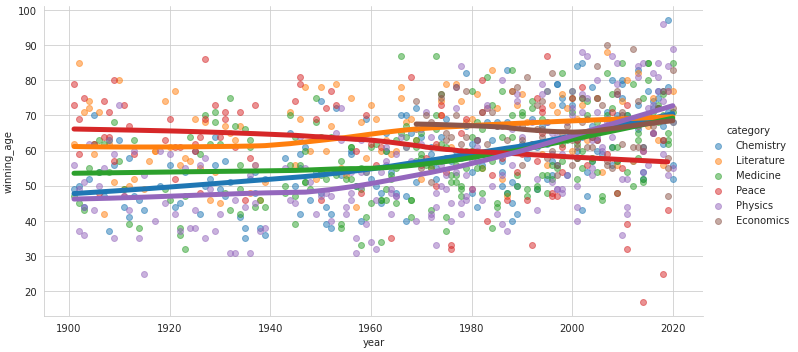

In [50]:
# 위의 서브 플랏을 하나로 합치기 
with sns.axes_style('whitegrid'):                 # 그래프 스타일 설정 - whitegrid
    # 산점도와 회귀선을 가진 서브플롯 그래프를 생성
    sns.lmplot(data=data,                         # 데이터 설정 
               x='year',                          # x축 데이터 설정 
               y='winning_age',                   # y축 데이터 설정 
               hue='category',                    # 여러 서브 플롯 생성 - 기준 'category'
               lowess=True,                       # 각 서브 플롯에 대해 로컬 가중 편균을 사용하여 부드로운 회귀선 그리기 
               aspect=2,                          # 각 서브플롯의 가로 세로 비율 설정 - 여기서는 가로 2배, 세로 1배 
               scatter_kws={'alpha': 0.5},        # 산점도 스타일 설정 - 투명도
               line_kws={'linewidth': 5})         # 회귀선 스타일 설정 - 두꺠
    
plt.show()

### Study 핵심 및 요약 
- NaN 값을 알아내고 조사하는 방법
- 객체와 문자열 데이터형을 숫자로 바꾸는 방법
- Potly로 도넛 차트와 막대그래프 그리기
- 시계열 데이터를 매끈하게 하기 위해 연속 평균을 만들고 추세를 보여주는 방법
- .value_counts(), .groupby(), .merge(), .sort_values(), .agg()를 사용하는 방법
- 지도에 데이터를 표시하기 위해 단계 구분도 만들기
- Potly로 데이터의 다른 부분들을 보여주는 막대그래프 그리기
- Potly로 선버스트 차트 그리기
- Seaborn의 .lmplot()를 이용해 row, hue, lowess 매개변수를 사용해 다양한 분야에 걸쳐 회귀선 보여주기
- 같은 데이터를 다른 방식으로 보면 어떻게 다른 그림이 나올 수 있는지 이해하기(예를 들어 상자그림 대 시계열 분석)
- Seaborn 히스토그램의 도움을 받아 데이터 분포를 확인하고 기술 통계를 시각화하기